In [33]:
cd /mmfs1/data/aglinska/BC-fMRI-AE/

/mmfs1/data/aglinska/BC-fMRI-AE


In [34]:
%time
import pandas as pd
import ants
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

CPU times: user 17 µs, sys: 2 µs, total: 19 µs
Wall time: 38.4 µs


In [35]:
df = pd.read_csv('./Data/ABIDE_df.csv')
df = df.iloc[~pd.isna(df['bids_folder'].values)]

In [36]:
#template_anat = ants.image_read('./Data/YeoAtlas/Atlas_brain_2mm.nii')
template_rois = ants.image_read('./Data/GlasserAtlas/glasser360MNI.nii')

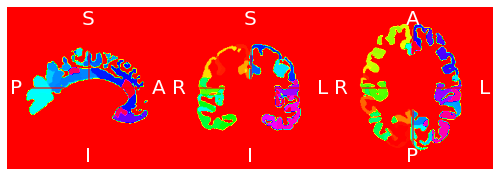

In [37]:
#template_anat.plot_ortho(template_rois,flat=True)
template_rois.plot_ortho(flat=True,cmap='hsv')

In [38]:
def get_epi(s):
    #s = 80
    sub = df['bids_folder'].values[s]
    epi = ants.image_read(f'../data/ABIDE/Derivatives/cpac_nofilt_global/{sub}/ses-1/func/{sub}_ses-1_mean.nii.gz')
    return epi

In [ ]:
def get_epi_4d(s):
    sub = df['bids_folder'].values[s]
    epi = ants.image_read(f'../data/ABIDE/Derivatives/cpac_nofilt_global/{sub}/ses-1/func/{sub}_ses-1_preproc.nii.gz')
    return epi

In [9]:
n = len(df)
epis = np.array([get_epi(s).numpy() for s in tqdm(range(n))])

100%|██████████| 1102/1102 [01:02<00:00, 17.53it/s]


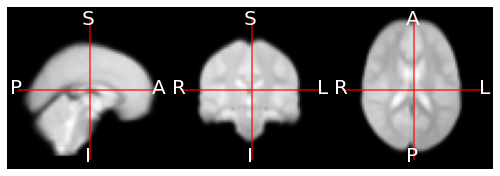

In [11]:
mepi = get_epi(0).new_image_like(epis.mean(axis=0))
mepi.plot_ortho(flat=True)
mepi.to_filename('./Data/GlasserAtlas/ABIDE_mepi.nii.gz')

In [12]:
# mepi = epi.new_image_like(epis.mean(axis=0))
# mepi.plot_ortho(flat=True)

In [18]:
tx = ants.registration(
    fixed=mepi,
    moving=template_rois,
    type_of_transform='SyNBoldAff',
    initial_transform=None)

In [21]:
epi_rois = ants.apply_transforms(
    fixed=mepi,
    moving=template_rois,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel')

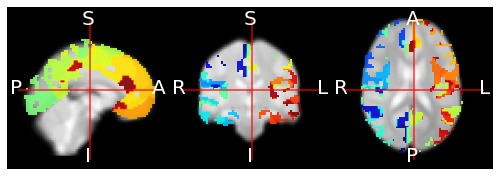

In [22]:
mepi.plot_ortho(epi_rois,flat=True)

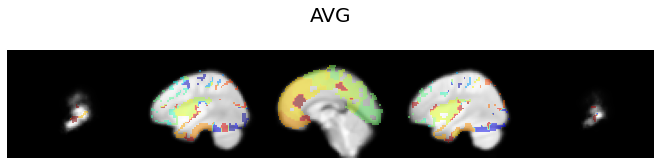

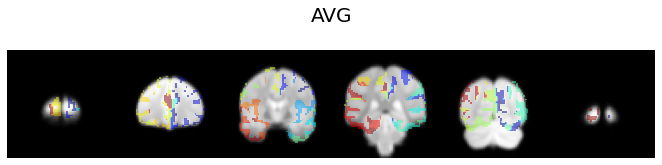

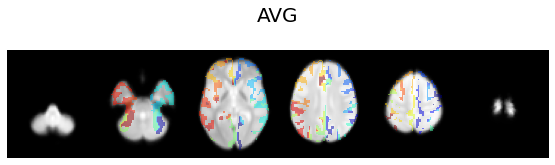

In [23]:
mepi.plot(epi_rois,title='AVG',overlay_alpha=.5,nslices=5,axis=0)
mepi.plot(epi_rois,title='AVG',overlay_alpha=.5,nslices=6,axis=1)
mepi.plot(epi_rois,title='AVG',overlay_alpha=.5,nslices=6,axis=2)

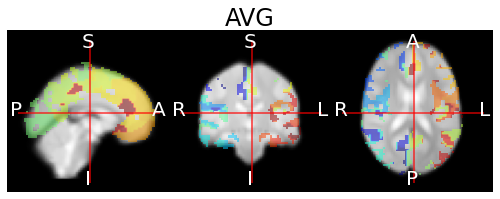

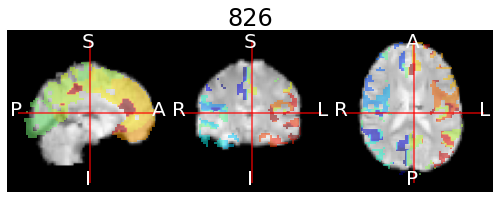

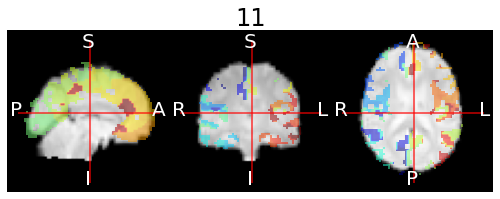

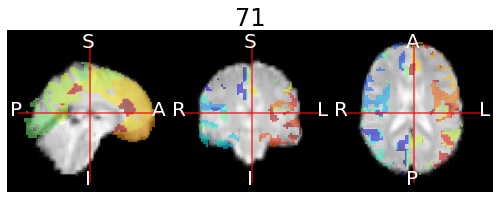

In [25]:
mepi.plot_ortho(epi_rois,flat=True,title='AVG',overlay_alpha=.5)
for i in range(3):
    ri = np.random.randint(low=0,high=1000,size=1)[0]
    this_epi = get_epi(ri)
    this_epi.plot_ortho(epi_rois,flat=True,title=ri,overlay_alpha=.5)   
this_epi.to_filename('./Data/GlasserAtlas/randsubepi.nii.gz')

In [26]:
epi_rois.to_filename('./Data/GlasserAtlas/epi_rois.nii.gz')

In [32]:
len(np.unique(epi_rois.numpy()))

361